In [1]:
import sys
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
conn = sqlite3.connect('BostonSeattle.db')
df_listings = pd.read_sql('SELECT * FROM cleanedListings', conn)
df_listings.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Dataset,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",None,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,None,NaN,NaN,0.0,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,"['email', 'phone', 'facebook', 'reviews']",1.0,0.0,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,0,0,1,NaN,Boston,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,1.0,1.00,0.0,https://a2.muscache.com/im/users/2572247/profi.

In [3]:
df_listings.to_csv('cleanedListings.csv')

## Q1: Which neighbourhoods have the highest average prices? Are they the same neighbourhoods having the highest avarage price per guest?

In [5]:
df_neighbourhood_prices=df_listings.groupby(['Dataset', 'neighbourhood'])[['price', 'price_per_accommodate']].mean().reset_index().sort_values(['Dataset','price_per_accommodate'], ascending=False)
df_neighbourhood_prices.head()

,Dataset,neighbourhood,price,price_per_accommodate
98,Seattle,Southeast Magnolia,231.705882,66.421569
85,Seattle,Pioneer Square,169.260870,62.976812
108,Seattle,Westlake,194.470588,57.125000
57,Seattle,Industrial District,173.333333,55.000000
53,Seattle,Harrison/Denny-Blaine,114.928571,54.410714


In [6]:
Boston_neighbourhood_prices=df_neighbourhood_prices[df_neighbourhood_prices['Dataset']=='Boston'].drop(columns='Dataset')
Boston_neighbourhood_prices.describe()

,price,price_per_accommodate
count,25.000000,25.000000
mean,173.226725,61.387590
std,65.365002,17.818274
min,75.125000,35.189236
25%,118.767568,45.133741
50%,187.609195,61.656803
75%,224.443299,76.290628
max,306.060241,92.550000


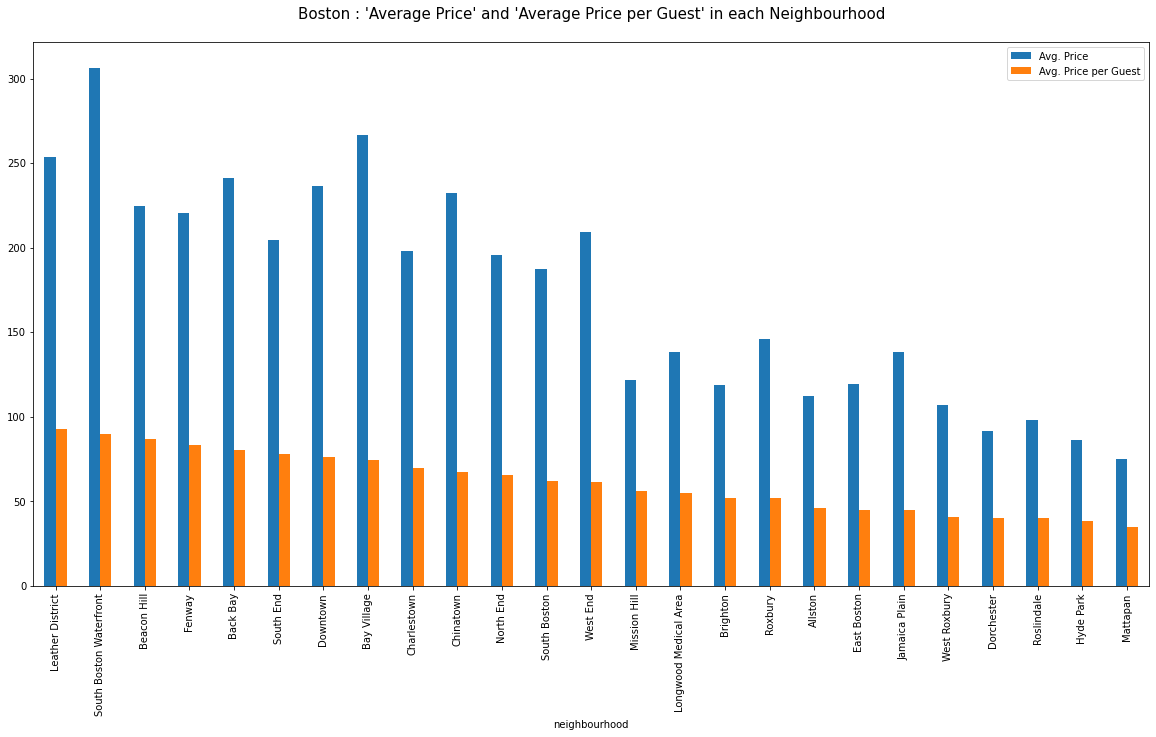

In [7]:
Boston_neighbourhood_prices.plot.bar(x='neighbourhood', figsize=(20,10));
plt.title("Boston : 'Average Price' and 'Average Price per Guest' in each Neighbourhood\n", fontsize=15);
plt.legend(['Avg. Price', 'Avg. Price per Guest']);

In [8]:
Seattle_neighbourhood_prices=df_neighbourhood_prices[df_neighbourhood_prices['Dataset']=='Seattle']
Seattle_neighbourhood_prices.describe()

,price,price_per_accommodate
count,87.000000,87.000000
mean,123.623676,39.579036
std,34.674579,8.616777
min,68.555556,22.562500
25%,95.950928,34.057399
50%,121.800000,38.447917
75%,142.704082,45.682232
max,231.705882,66.421569


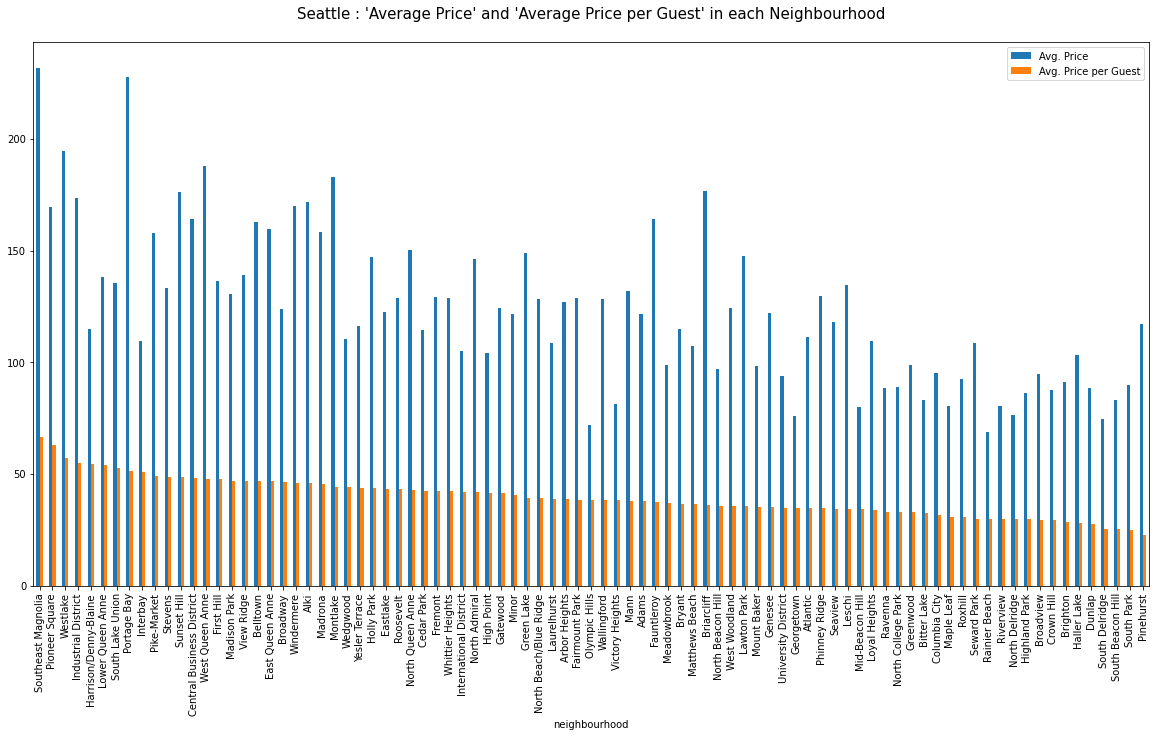

In [9]:
Seattle_neighbourhood_prices.plot.bar(x='neighbourhood', figsize=(20,10));
plt.title("Seattle : 'Average Price' and 'Average Price per Guest' in each Neighbourhood\n", fontsize=15);
plt.legend(['Avg. Price', 'Avg. Price per Guest']);

## Q2: How prices in the two cities compare based on the property types?

In [10]:
def prop_type_df(df, dataset, sort_by_med=True):
    df_prop_type=df[df['Dataset']==dataset].dropna(subset=['property_type']).pivot(columns=["property_type"], values="price_per_accommodate")#.plot.box(figsize=(10,15), rot=45);
    if sort_by_med:
        meds=df_prop_type.median()
        meds.sort_values(ascending=False, inplace=True)
        df_prop_type=df_prop_type[meds.index]
    #df_prop_type.plot.box(figsize=(10,15), rot=45);
    return df_prop_type

In [11]:
df_prop_type_Boston=prop_type_df(df_listings, 'Boston')
df_prop_type_Seattle=prop_type_df(df_listings, 'Seattle')

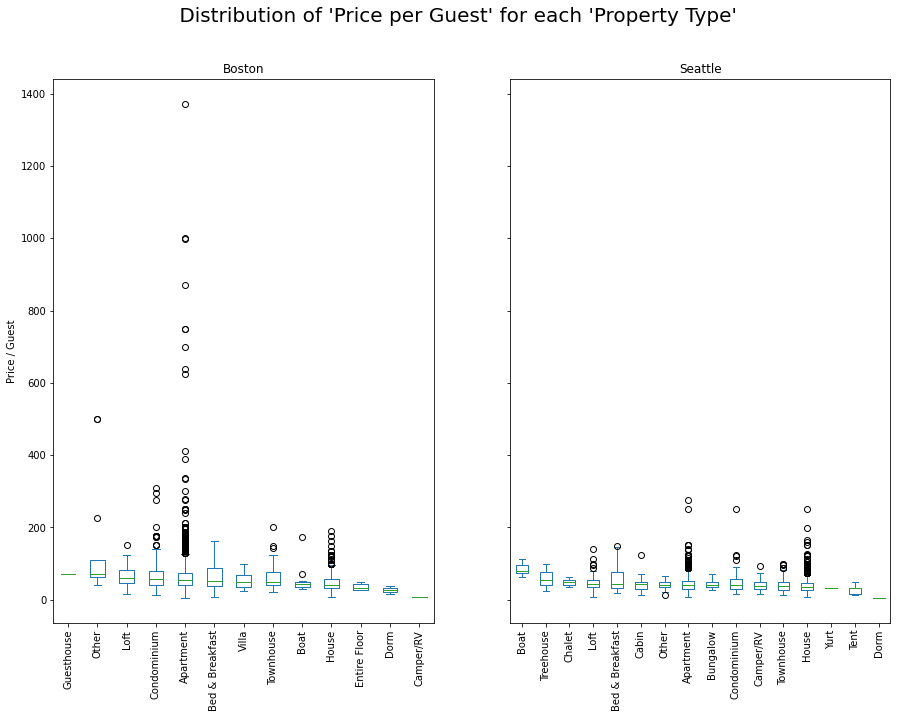

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

df_prop_type_Boston.plot.box(title='Boston', xlabel='Property Type', ylabel='Price / Guest', figsize=(15,10), rot=90, ax=axes[0]);
df_prop_type_Seattle.plot.box(title='Seattle', xlabel='Property Type', ylabel='Price / Guest', figsize=(15,10), rot=90, ax=axes[1]);
fig.suptitle(" Distribution of 'Price per Guest' for each 'Property Type' ", fontsize=20);

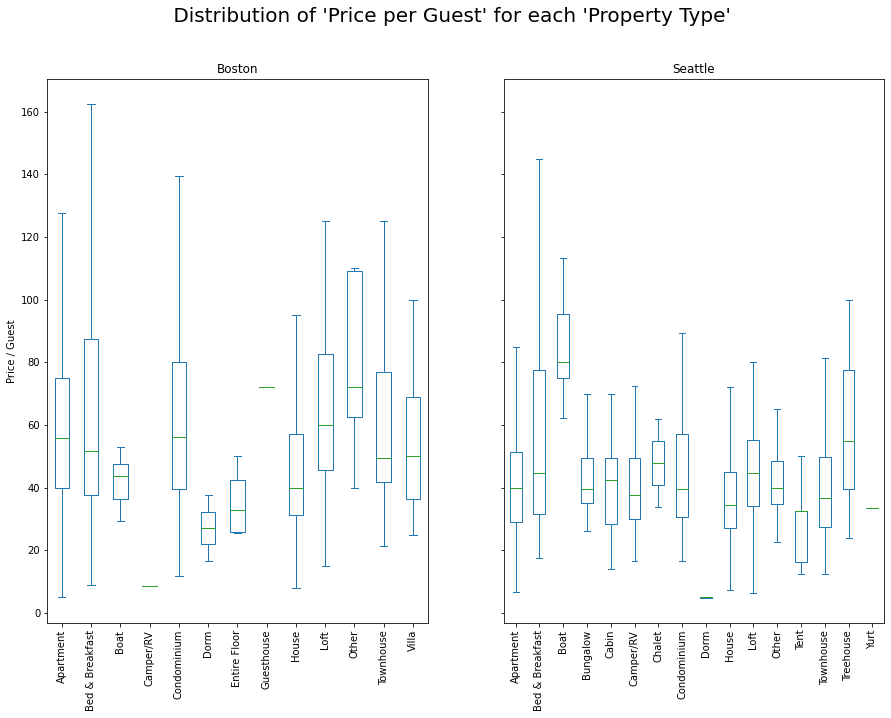

In [13]:
df_prop_type_Boston=prop_type_df(df_listings, 'Boston', False)
df_prop_type_Seattle=prop_type_df(df_listings, 'Seattle', False)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

df_prop_type_Boston.plot.box(title='Boston', xlabel='Property Type', ylabel='Price / Guest', figsize=(15,10), rot=90, ax=axes[0], showfliers=False);
df_prop_type_Seattle.plot.box(title='Seattle', xlabel='Property Type', ylabel='Price / Guest', figsize=(15,10), rot=90, ax=axes[1], showfliers=False);
fig.suptitle(" Distribution of 'Price per Guest' for each 'Property Type' ", fontsize=20);

## Q3: What are the most and the least important amenities in each city?

In [14]:
df_listings.iloc[:,-45:].head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [15]:
df_amenities=pd.concat([df_listings[['Dataset']],df_listings.iloc[:,-45:]], axis=1)
df_amenities.head()

,Dataset,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,Boston,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,Boston,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,Boston,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,Boston,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,Boston,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [16]:
df_amenities.fillna(0, inplace=True)

In [22]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Boston',ascending=False)

Dataset,Boston,Seattle
Wireless Internet,0.954254,0.960450
Heating,0.943933,0.949974
Kitchen,0.916039,0.896543
Essentials,0.835146,0.847826
Smoke Detector,0.811994,0.859350
Air Conditioning,0.786890,0.177318
TV,0.727197,0.674175
Internet,0.718828,0.736249
Dryer,0.690656,0.784966
Washer,0.690377,0.783656


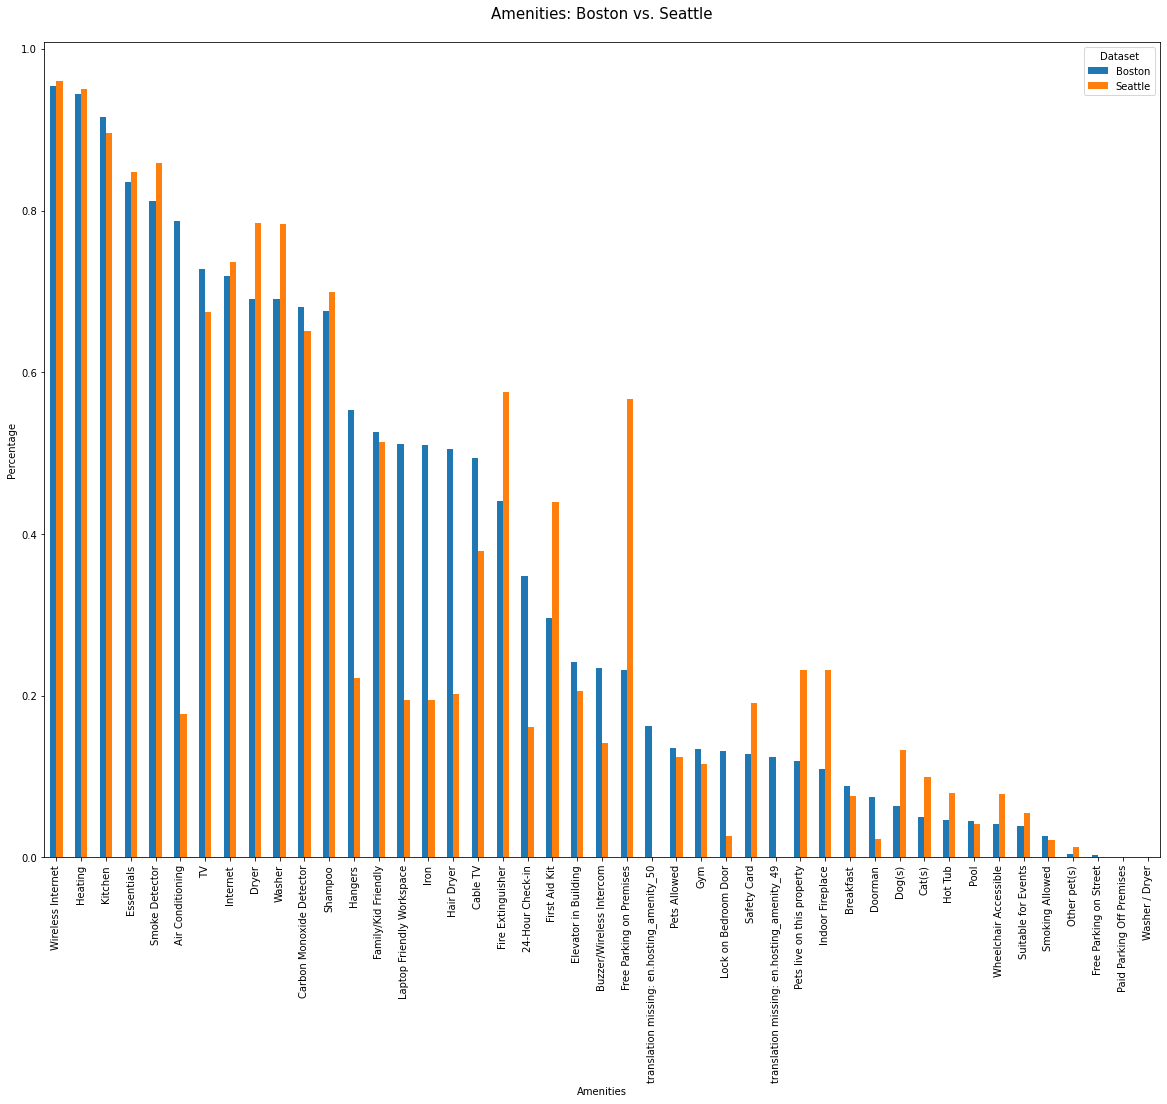

In [20]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Boston',ascending=False).plot.bar(figsize=(20,15));
plt.title("Amenities: Boston vs. Seattle\n", fontsize=15);
plt.xlabel('Amenities');
plt.ylabel('Percentage');

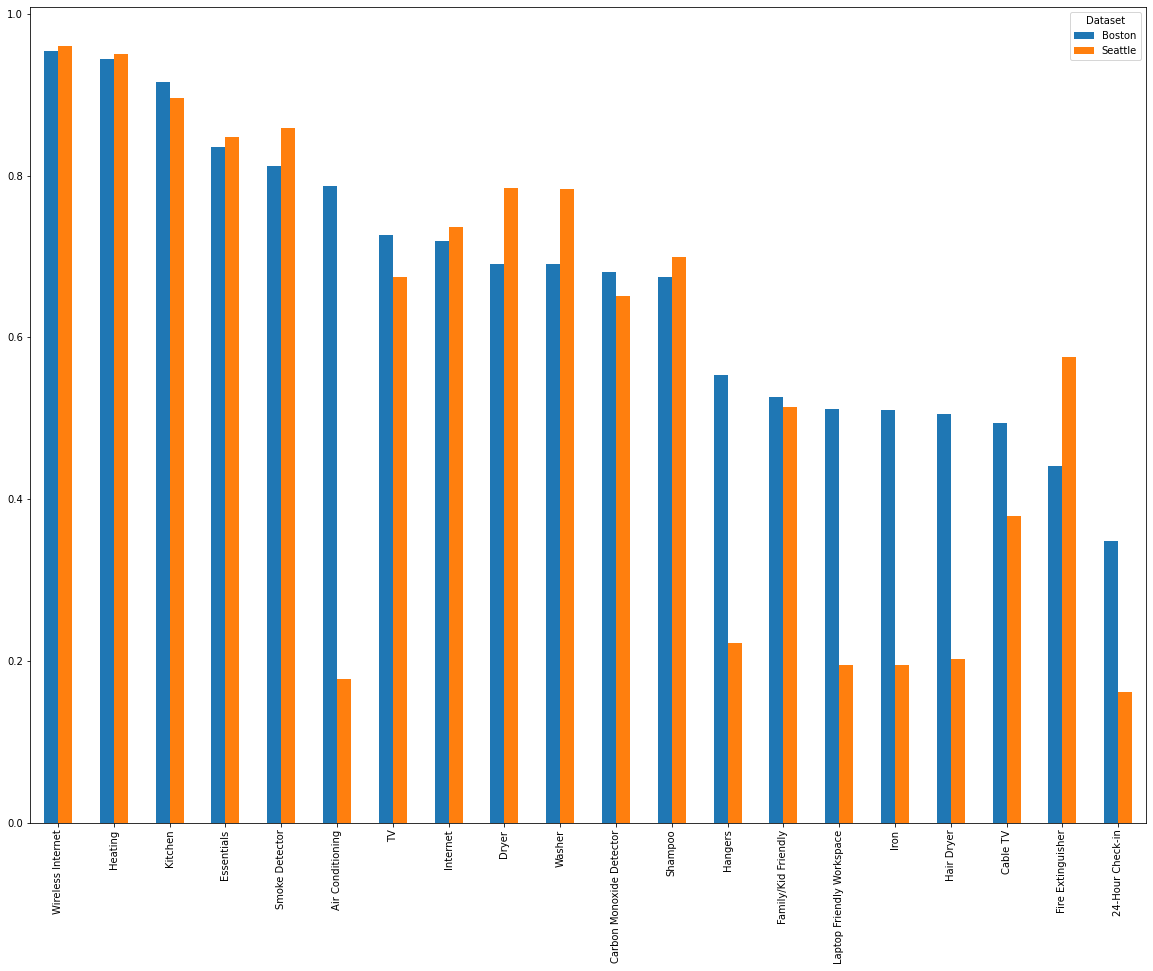

In [25]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Boston',ascending=False).iloc[:20].plot.bar(figsize=(20,15));

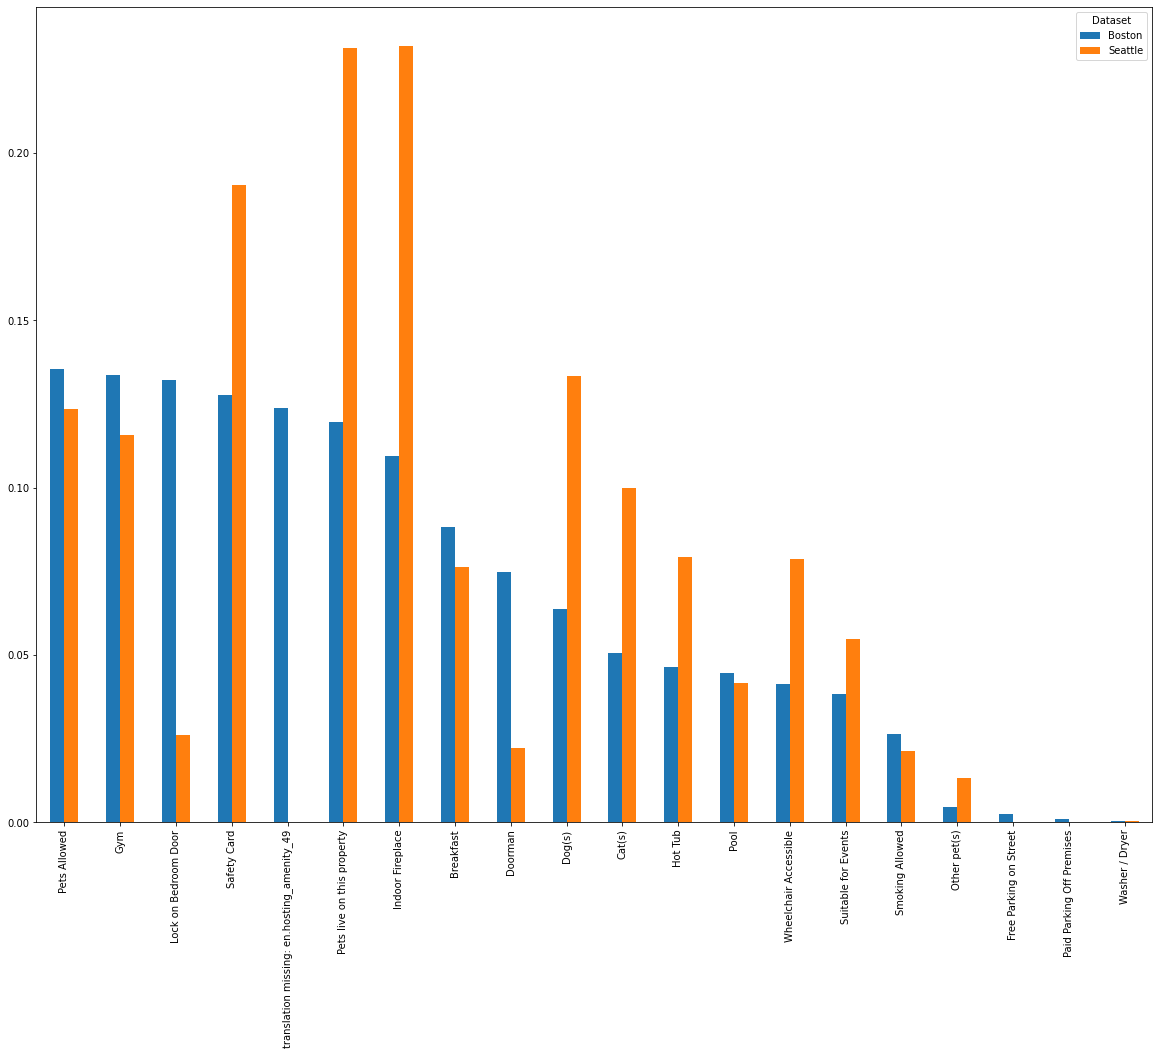

In [26]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Boston',ascending=False).iloc[-20:].plot.bar(figsize=(20,15));

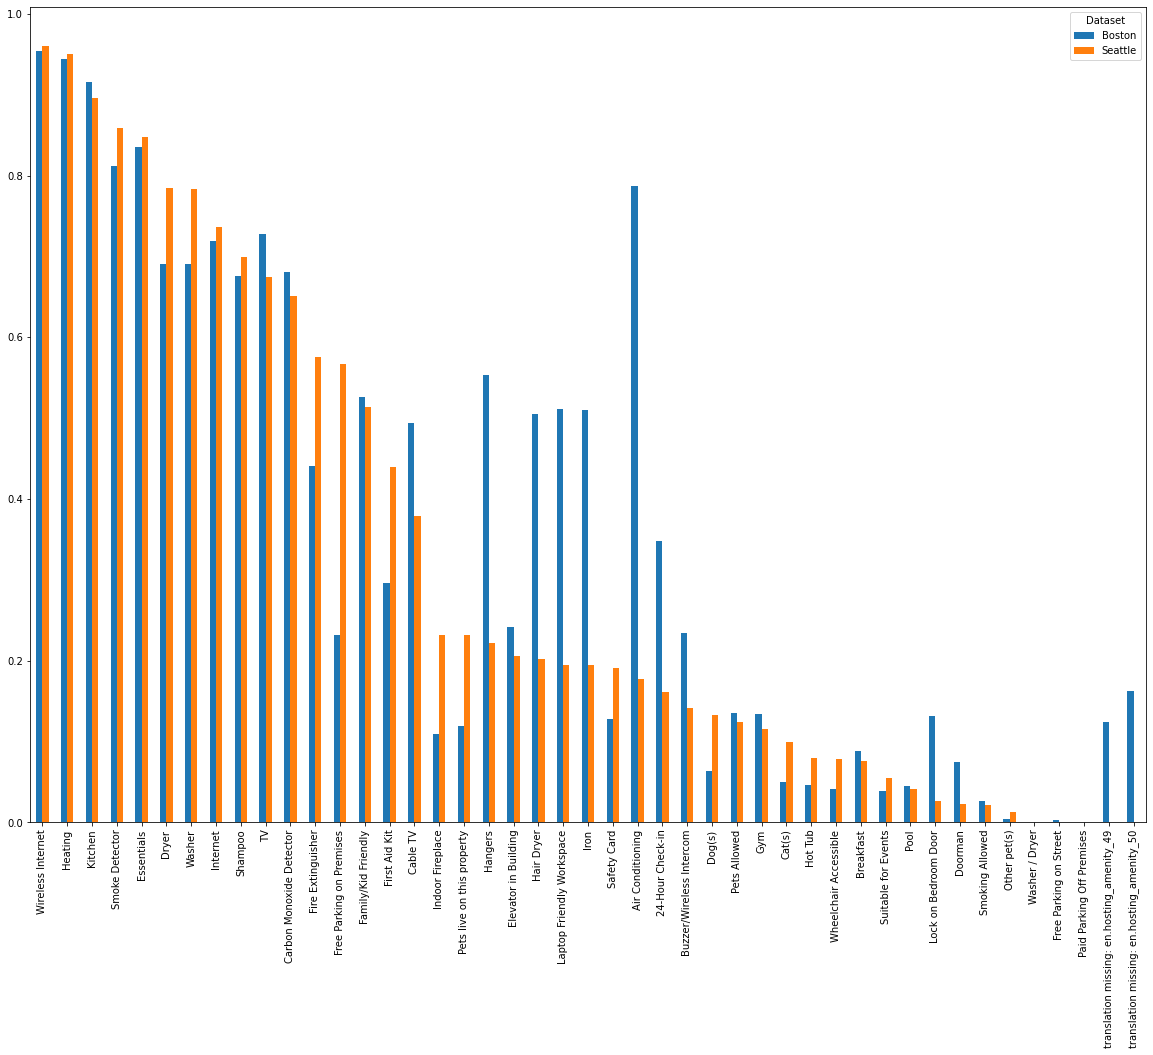

In [27]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Seattle',ascending=False).plot.bar(figsize=(20,15));

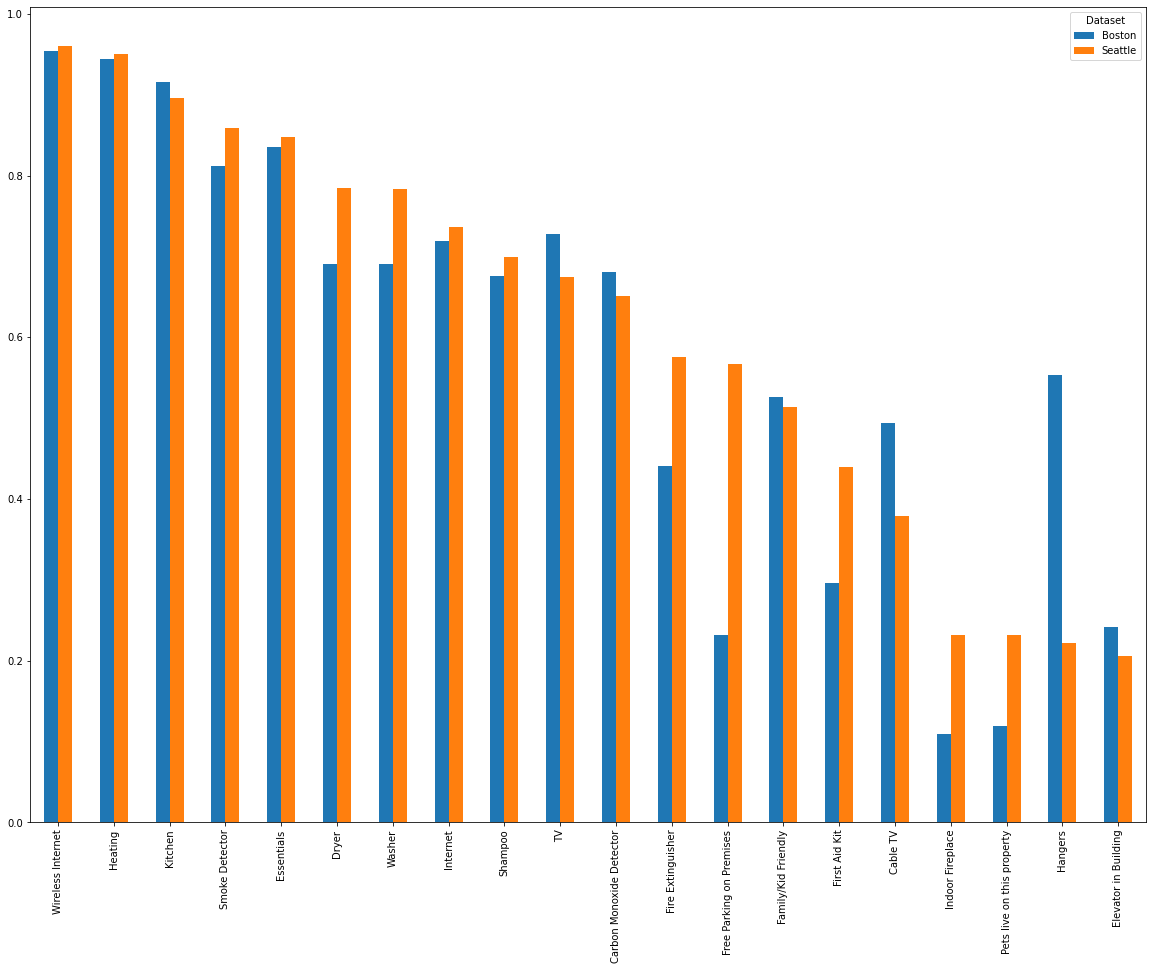

In [28]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Seattle',ascending=False).iloc[:20].plot.bar(figsize=(20,15));

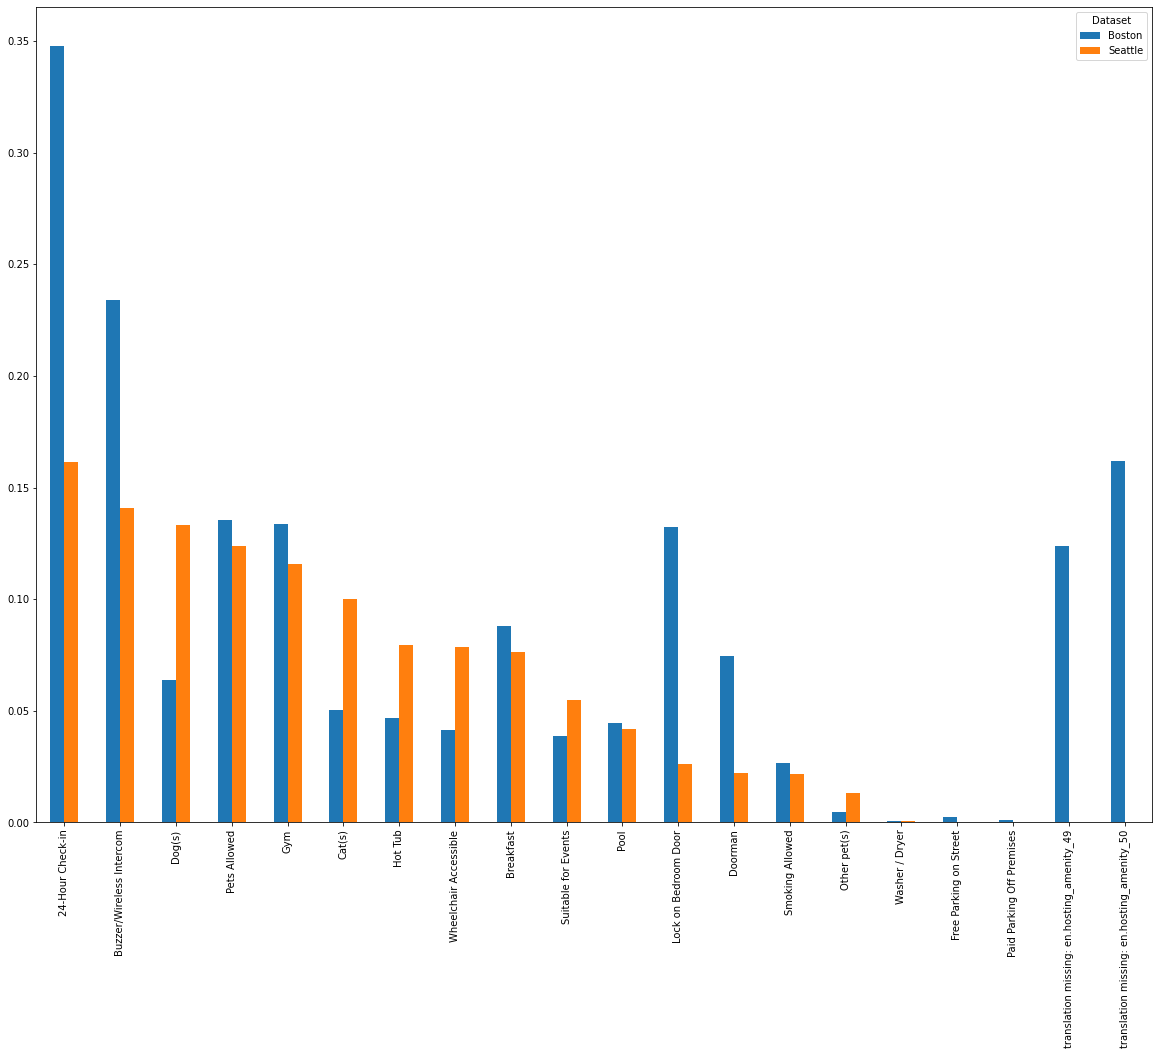

In [29]:
df_amenities.groupby('Dataset').mean().transpose().sort_values('Seattle',ascending=False).iloc[-20:].plot.bar(figsize=(20,15));

## Q4: Where are the top-rated listings, in each city/neighbourhood, located on the map?
## Those are the listings that have a 'review scores rating' of more than 95.

[This is a link](https://public.tableau.com/app/profile/mohamed.hedeya/viz/Boston_vs_Seattle/AirbnbTop-RatedListingsBostonvs_Seattle?publish=yes) to the Tableau Dashboard.

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1682366486785' style='position: relative'><noscript><a href='#'><img alt='Airbnb Top-Rated Listings (Boston vs. Seattle) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Boston_vs_Seattle&#47;AirbnbTop-RatedListingsBostonvs_Seattle&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Boston_vs_Seattle&#47;AirbnbTop-RatedListingsBostonvs_Seattle' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Boston_vs_Seattle&#47;AirbnbTop-RatedListingsBostonvs_Seattle&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1682366486785');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Q5: Do prices vary depending on the month? Which months have the highest prices?
## Q6: What is the relationship between prices and availability?

In [23]:
df_calendars = pd.read_sql('SELECT * FROM cleanedCalendars', conn)
df_calendars.head()

,listing_id,date,available,price,Dataset,month,month_name,year,month-year
0,12147973,2017-09-05 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017
1,12147973,2017-09-04 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017
2,12147973,2017-09-03 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017
3,12147973,2017-09-02 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017
4,12147973,2017-09-01 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017


In [25]:
month_city_price=pd.concat([df_calendars, df_calendars.pivot(columns=["Dataset"], values="price")], axis=1)
month_city_price.head()

,listing_id,date,available,price,Dataset,month,month_name,year,month-year,Boston,Seattle
0,12147973,2017-09-05 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,NaN,NaN
1,12147973,2017-09-04 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,NaN,NaN
2,12147973,2017-09-03 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,NaN,NaN
3,12147973,2017-09-02 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,NaN,NaN
4,12147973,2017-09-01 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,NaN,NaN


In [26]:
months_order=['January','February','March', 'April','May', 'June', 'July', 'August', 'September', 'October','November','December']

In [27]:
month_avg_price= month_city_price.groupby('month_name').mean().reindex(months_order, axis=0)[['Boston', 'Seattle']]
month_avg_price

,Boston,Seattle
month_name,,
January,182.799671,122.912176
February,180.961028,124.293927
March,181.818742,128.644488
April,197.252890,135.097005
May,193.712295,139.538183
June,196.535302,147.473137
July,202.486309,152.094150
August,203.330142,150.656594
September,237.047727,143.255949


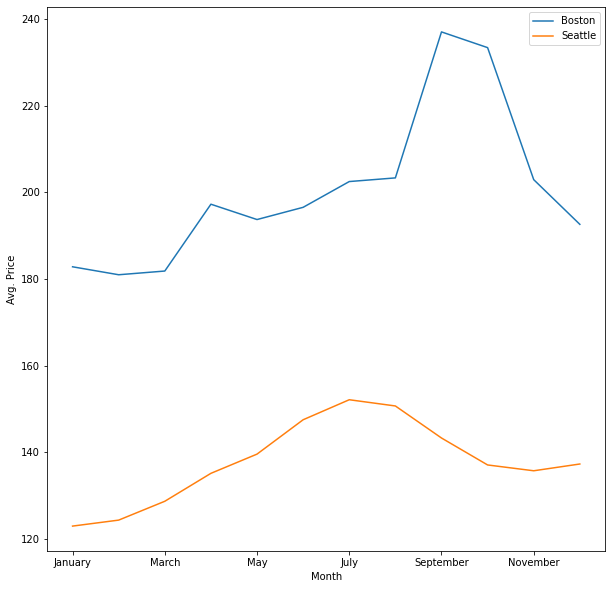

In [28]:
month_avg_price.plot.line(xlabel='Month', ylabel='Avg. Price', figsize=(10,10));

In [29]:
months=[str(i).zfill(2) for i in range(1,13)]
years=['2016', '2017']

month_year=[]
for year in years:
    for month in months:
        month_year.append(month+'-'+year)
month_year

['01-2016',
 '02-2016',
 '03-2016',
 '04-2016',
 '05-2016',
 '06-2016',
 '07-2016',
 '08-2016',
 '09-2016',
 '10-2016',
 '11-2016',
 '12-2016',
 '01-2017',
 '02-2017',
 '03-2017',
 '04-2017',
 '05-2017',
 '06-2017',
 '07-2017',
 '08-2017',
 '09-2017',
 '10-2017',
 '11-2017',
 '12-2017']

In [30]:
month_year_city_avg_price=month_city_price.groupby('month-year').mean().reindex(month_year, axis=0).dropna(how='all')[['Boston', 'Seattle']]
month_year_city_avg_price

,Boston,Seattle
month-year,,
01-2016,NaN,121.568409
02-2016,NaN,124.293927
03-2016,NaN,128.644488
04-2016,NaN,135.097005
05-2016,NaN,139.538183
06-2016,NaN,147.473137
07-2016,NaN,152.094150
08-2016,NaN,150.656594
09-2016,252.677308,143.255949


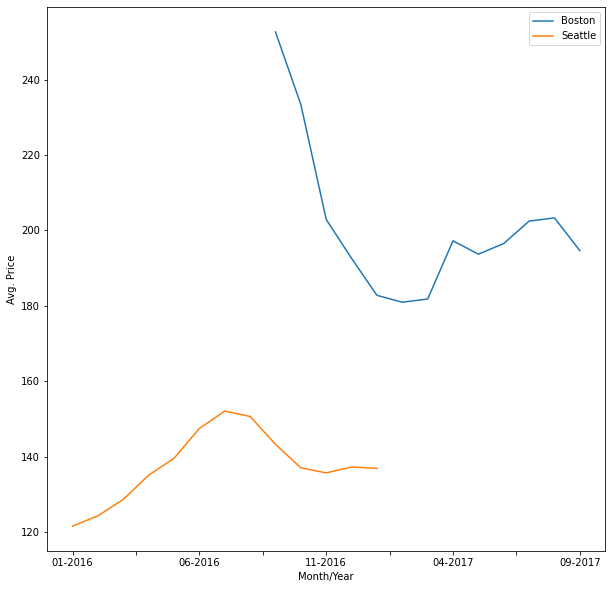

In [31]:
month_year_city_avg_price.plot.line(xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10));

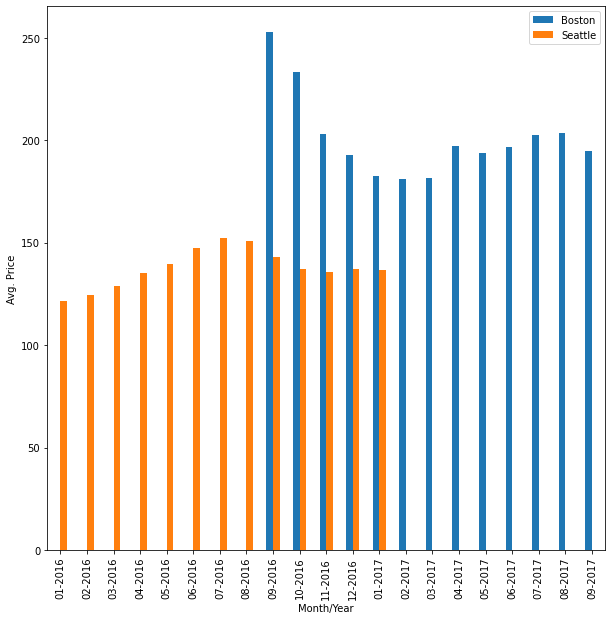

In [32]:
month_year_city_avg_price.plot.bar(xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10));

In [33]:
month_city_avail=pd.concat([df_calendars, df_calendars.pivot(columns=["Dataset"], values="available")], axis=1)
month_city_avail.head()

,listing_id,date,available,price,Dataset,month,month_name,year,month-year,Boston,Seattle
0,12147973,2017-09-05 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,0.0,NaN
1,12147973,2017-09-04 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,0.0,NaN
2,12147973,2017-09-03 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,0.0,NaN
3,12147973,2017-09-02 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,0.0,NaN
4,12147973,2017-09-01 00:00:00.000000,0,NaN,Boston,9,September,2017,09-2017,0.0,NaN


In [34]:
month_avg_avail= month_city_avail.groupby('month_name').mean().reindex(months_order, axis=0)[['Boston', 'Seattle']]
month_avg_avail

,Boston,Seattle
month_name,,
January,0.568348,0.566937
February,0.565792,0.662208
March,0.496384,0.709187
April,0.477617,0.663847
May,0.482162,0.675670
June,0.490156,0.674384
July,0.494423,0.627097
August,0.499802,0.645051
September,0.310448,0.674402


In [35]:
month_year_city_avg_avail=month_city_avail.groupby('month-year').mean().reindex(month_year, axis=0).dropna(how='all')[['Boston', 'Seattle']]
month_year_city_avg_avail

,Boston,Seattle
month-year,,
01-2016,NaN,0.554133
02-2016,NaN,0.662208
03-2016,NaN,0.709187
04-2016,NaN,0.663847
05-2016,NaN,0.675670
06-2016,NaN,0.674384
07-2016,NaN,0.627097
08-2016,NaN,0.645051
09-2016,0.272181,0.674402


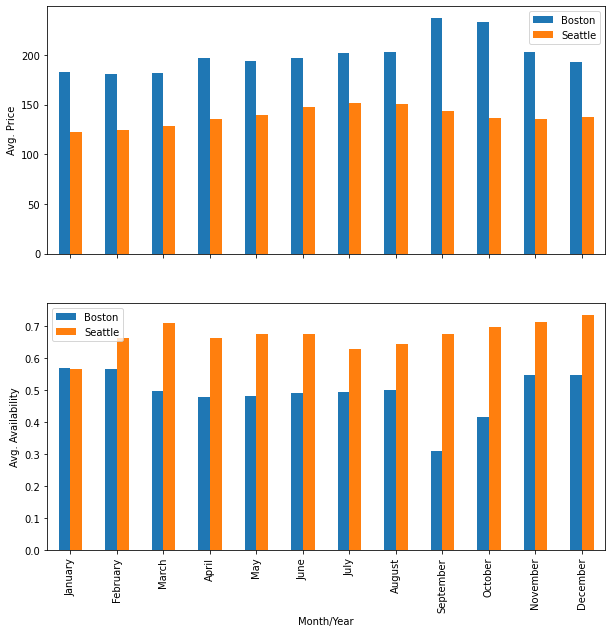

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1)
month_avg_price.plot.bar(ax=axes[0], xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10), sharex=True);
month_avg_avail.plot.bar(ax=axes[1], xlabel='Month/Year', ylabel='Avg. Availability', figsize=(10,10));

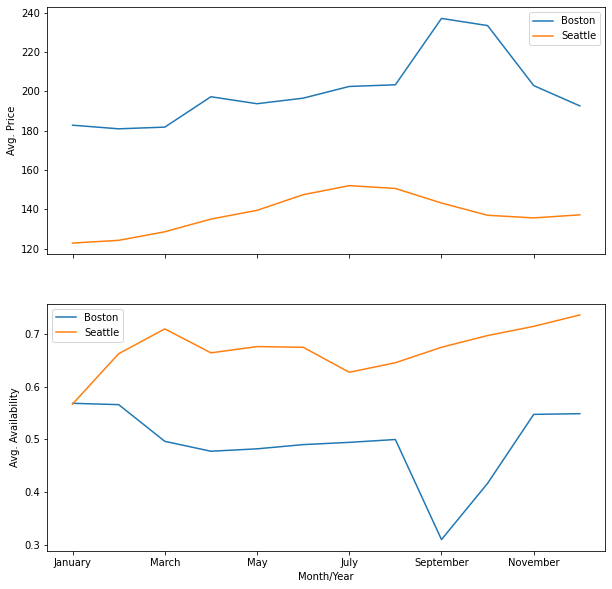

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=1)
month_avg_price.plot.line(ax=axes[0], xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10), sharex=True);
month_avg_avail.plot.line(ax=axes[1], xlabel='Month/Year', ylabel='Avg. Availability', figsize=(10,10));

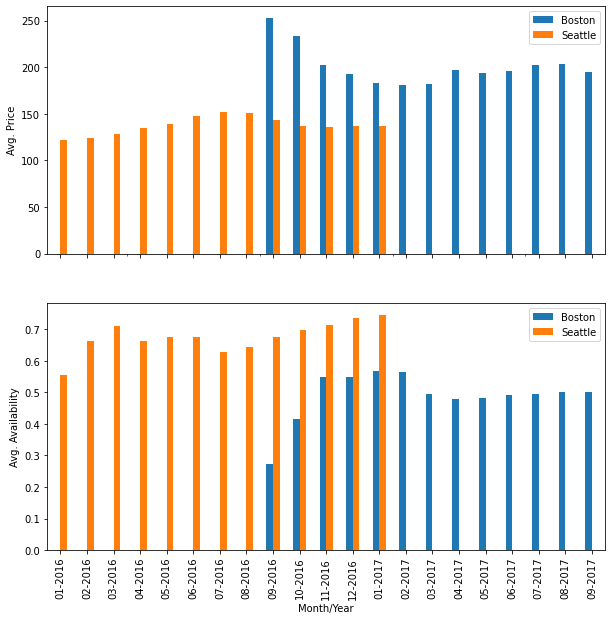

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1)
month_year_city_avg_price.plot.bar(ax=axes[0], xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10), sharex=True);
month_year_city_avg_avail.plot.bar(ax=axes[1], xlabel='Month/Year', ylabel='Avg. Availability', figsize=(10,10));

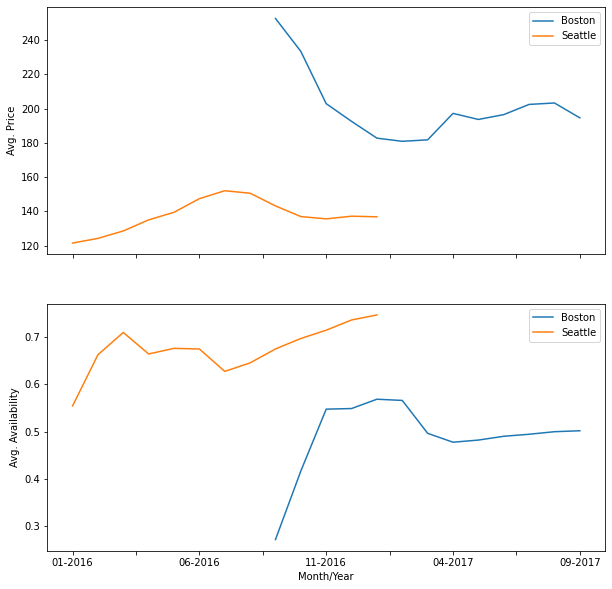

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1)
month_year_city_avg_price.plot.line(ax=axes[0], xlabel='Month/Year', ylabel='Avg. Price', figsize=(10,10), sharex=True);
month_year_city_avg_avail.plot.line(ax=axes[1], xlabel='Month/Year', ylabel='Avg. Availability', figsize=(10,10));